In [1]:
# import a few useful libraries
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt

# Example: Clausius-Clapeyron Equation

## Introduction

This notebook is an interactive development environment (IDE) where you can run Python code to do calculations, numerical simuluation, and much more.

For this example, we'll plot the atmospheric saturation water vapour pressure as a function of air temperature.

The numpy library has a `linspace()` function that creates arrays of numbers with specific properties.

Here we're interested in looking at saturation vapour pressure for a range of temperatures we want to explore.  Say **0 degrees to 30 degrees Celsius** (the relationship does not hold below zero).  We can also specify how many points we want between the minimum and maximum we've set.  Let's say 50 for now.

In [2]:
min_temp = 1
max_temp = 30
temperature_range = np.linspace(min_temp, max_temp, 50)

# alternatively we could specify the step size

### Errors

Did you get an error that says `NameError: name 'np' is not defined`?

Recall that code cells must be executed in order to load the requisite libraries, variables, etc. into memory.  The error above suggests the very first cell in this notebook wasn't executed, so the numpy library is not yet accessible in the variable `np`.  Note the line `import numpy as np` loads the numpy library and makes its many functions available from the variable `np`. 

In [3]:
temperature_range

array([ 1.        ,  1.59183673,  2.18367347,  2.7755102 ,  3.36734694,
        3.95918367,  4.55102041,  5.14285714,  5.73469388,  6.32653061,
        6.91836735,  7.51020408,  8.10204082,  8.69387755,  9.28571429,
        9.87755102, 10.46938776, 11.06122449, 11.65306122, 12.24489796,
       12.83673469, 13.42857143, 14.02040816, 14.6122449 , 15.20408163,
       15.79591837, 16.3877551 , 16.97959184, 17.57142857, 18.16326531,
       18.75510204, 19.34693878, 19.93877551, 20.53061224, 21.12244898,
       21.71428571, 22.30612245, 22.89795918, 23.48979592, 24.08163265,
       24.67346939, 25.26530612, 25.85714286, 26.44897959, 27.04081633,
       27.63265306, 28.2244898 , 28.81632653, 29.40816327, 30.        ])

This cell is set to "Markdown" which is an easy way to format text nicely.  

More information on formatting text blocks using Markdown [can be found here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

<img src="img/block_type.png" alt="Block-type dropdown menu" style="width: 400px;"/>

Most academic writing is formatted using a system called [LaTeX](https://www.latex-project.org/).  

>**Note:** If you think you might want to apply to grad school, you will almost certainly have to learn LaTeX.  If you can work with Markdown (hint: you can!), it isn't much further to preparing your work using LaTeX.  [Overleaf](https://www.overleaf.com/) is a great web application for storing and collaborative editing of LaTeX documents.


Let's write the Clausius-Clapeyron equation in a print-worthy format:

## Clausius-Clapeyron Equation

The change in saturation vapour pressure of air as a function of temperature is given in differential form by:

$$\frac{de_s}{dT} = \frac{L_v(T)\cdot e_s}{R_v \cdot T^2}$$ 

Assuming $L_v$ is constant yields the approximation$^{[1]}$:

$$e_s(T) = e_{s0} \cdot exp \left(\frac{L_v}{R_v} \left[ \frac{1}{T_0} - \frac{1}{T} \right] \right) $$


Where:
* $L_v$ is the latent heat of vaporization, (constant approximation 0-35 Celsius = $2.5\times10^6 \frac{J}{kg \cdot K}$)
* $R_v$ is the vapor pressure gas constant ($461 \frac{J}{kg \cdot K}$)
* $T$ is air temperature in Kelvin
* $T_0$ and $e_{s0}$ are constants ($273 K$ and $0.611 kPa$)

1.  Margulis, S. *Introduction to Hydrology*. 2014.

We can write this as a function in Python:

In [4]:
def calculate_saturation_vapour_pressure(T):
    """
    Given T (temperature) as an input in Celsius,
    return the saturation vapour pressure of air.
    Output units are in kiloPascals [kPa].
    """
    e_s0 = 0.611
    L_v = 2.5E6
    R_v = 461
    T_0 = 273.16
    T_k = T + T_0
    return e_s0 * math.exp( (L_v/R_v) * (1/T_0 - 1/T_k))
    

It's good practice to write functions into simple components so they can be reused and combined.  

Calculate the saturation vapour pressure for the temperature range we defined above:

In [5]:
# create an empty array to store the vapour pressures we will calculate
vapour_pressures = []
# iterate through the temperature array we created above
for t in temperature_range:
    sat_vapour_pressure = calculate_saturation_vapour_pressure(t)
    vapour_pressures.append(sat_vapour_pressure)

Text(0, 0.5, 'Saturation Vapour Pressure (kPa)')

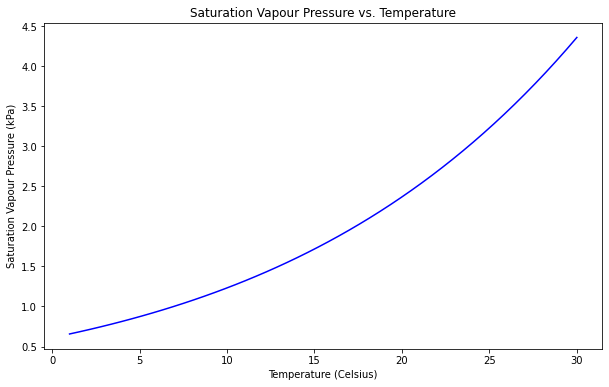

In [6]:
# now plot the result 
# note in the matplotlib plotting library the figsize is defined in inches by default
# here we're saying 10" wide by 6" high

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(temperature_range, vapour_pressures, 'b-')
ax.set_title('Saturation Vapour Pressure vs. Temperature')
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Saturation Vapour Pressure (kPa)')

Below we'll create a function to calculate dewpoint temperature that uses the vapour pressure function above.

In [7]:
def calculate_dewpoint_temperature(rh, T):
    """
    Given relative humidity and ambient temperature (in Celsius), 
    return the dewpoint temperature in Celsius.
    """
    # declare constants
    L_v = 2.5E6
    R_v = 461
    e_s0 = 0.611
    T_0 = 273.16
    
    e_s = calculate_saturation_vapour_pressure(T)
    # calculate the (actual) vapour pressure
    e_a = rh * e_s
    # calculate the dewpoint temperature    
    T_dk = 1 / (1/T_0 - (R_v / L_v) * np.log(e_a / e_s0))
    
    T_d = T_dk - T_0
    
    # if the dewpoint temperature is below zero, return NaN
    if T_d < 0:
        return np.nan
    else:
        return T_d

Let's assume we want to explore the dewpoint temperature as a function of relative humidity.

In [8]:
# create an array to represent the relative humidity from 10% to 100%
rh_range = np.linspace(0.1, 1, 10)

This time we'll use a *list comprehension* instead of a "for" loop to calculate the dewpoint temperature where we assume temperature is constant but we want to evaluate a range of relative humidity.  When might we encounter such a situation?

In [9]:
t_amb = 25
dewpt_temps = [calculate_dewpoint_temperature(rh, t_amb) for rh in rh_range]

Text(0, 0.5, 'Dewpoint Temperature (Celsius)')

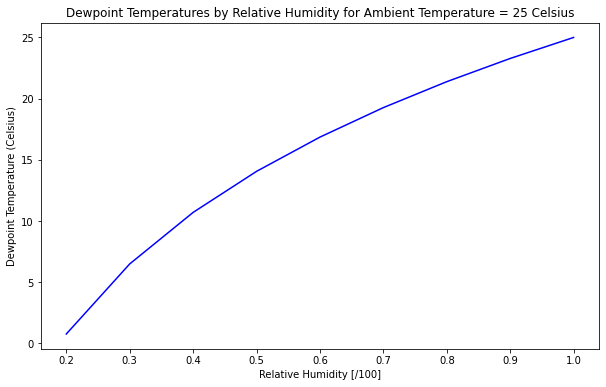

In [10]:
# now plot the result 
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(rh_range, dewpt_temps, 'b-')
ax.set_title(f'Dewpoint Temperatures by Relative Humidity for Ambient Temperature = {t_amb} Celsius')
ax.set_xlabel('Relative Humidity [/100]')
ax.set_ylabel('Dewpoint Temperature (Celsius)')

Let's get really fancy and create a heat map to express the relationship between ambient air temperature, relative humidity, and dewpoint temperature.

See this [gist example](https://gist.github.com/Kautenja/f9d6fd3d1dee631200bc11b8a46a76b7) used as a template.

In [11]:
ambient_temp_range = np.linspace(0, 50, 100)
rh_range = np.linspace(0.01, 1.0, 100)

# create an empty dataframe to store results
dewpt_df = pd.DataFrame()
dewpt_df['T_amb'] = ambient_temp_range 
dewpt_df.set_index('T_amb', inplace=True)

for r in rh_range:
    dewpt_df[r] = [calculate_dewpoint_temperature(r, t) for t in dewpt_df.index]

In [12]:
data = dewpt_df.T

Text(0.5, 1.0, 'Dewpoint Temperature [degrees Celsius]')

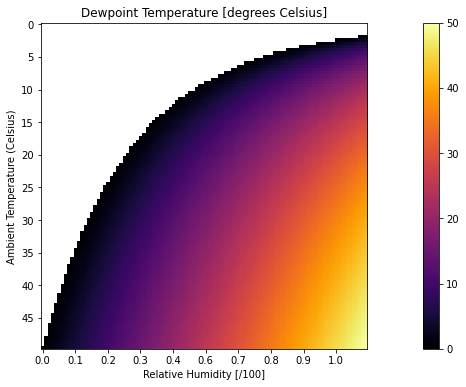

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
img = ax.imshow(data, cmap='inferno')
fig.colorbar(img)

ambient_temp_labels = np.arange(0, 50, 5)
rh_labels = np.linspace(0.01, 1.0, 10).round(1)

label_locs = np.arange(0, 100, 10)

# Show all ticks and label them with the respective list entries
# set x ticks to ambient temperature and y to relative humidity
ax.set_yticks(label_locs)
ax.set_xticks(label_locs)
ax.set_yticklabels(ambient_temp_labels)
ax.set_xticklabels(rh_labels)

ax.set_xlabel('Relative Humidity [/100]')
ax.set_ylabel('Ambient Temperature (Celsius)')

ax.set_title("Dewpoint Temperature [degrees Celsius]")

### Other examples of functions related to atmospheric energy balance

In [14]:
def calculate_blackbody_radiation(T):
    """
    Given T (temperature) as an input in Kelvin,
    return the unit area (area = 1m^2) 
    **black body** radiative power in W/m^2/K^4.
    """
    sigma=5.670374419e-8
    return sigma*(T^4)

In [15]:
def calculate_greybody_radiation(T,emiss):
    """
    Given T (temperature) as an input in Kelvin,
    return the unit area (area = 1m^2) 
    **grey body** radiative power in W/m^2/K^4..
    """
    sigma=5.670374419e-8
    return sigma*emiss*(T^4)

Stefan-Bolzmann Constant ($\sigma$):
$\sigma = 5.670374419×10^8$ $W m^{−2}⋅K^{−4}$

In [16]:
calculate_blackbody_radiation(5500)

0.00031164377806824